# Answers to Lab 2 homework

## Task 1: Vector data

<strong>Task:</strong> Please write some code to print the numbers of crime incidents in all the different crime types.

<strong>Submit:</strong> The code and printed output

<br>
<p>- Try to write elegant code: the fewer lines the better.
<p>- Try to search for the solution using Google. For instance, search 'Python, count itmes in data frame by category' and find posts that solve similar problems.


In [14]:
# Load the geopandas package, and name it gdp
import geopandas as gdp

# Read the shapefile crime.shp into data.
# Change the file path accordingly. You can copy from the previous task
data = gdp.read_file("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab2_data/crime.shp")

# Print the unique crime types
data['Offence_ty'].unique()

array(['PROPERTY DAMAGE', 'DUI', 'THEFT', 'DRUGS/NARCOTICS', 'LIQUOR LAW',
       'ASSAULT,SIMPLE', 'BURGLARY', 'MOTOR VEH THEFT', 'SEX ASSAULT',
       'FRAUD', 'UEMV', 'AGGRAVATED ASSAULT', 'THREATENING', 'RAPE',
       'DISORDER CONDUCT', 'ROBBERY', 'ARSON', 'WEAPONS', 'GRAFFITI',
       'LIC-PLATE THEFT', 'ROBBERY-VEH TAKEN', 'BURGLARY-VEH TAKEN'],
      dtype=object)

### Solution 1
Get the 1-D array of unique crime types

Then use a for loop to print the count in each crime types

In [15]:
# Print the count in each crime type using a for loop
crime_ty = data['Offence_ty'].unique()

for crime in crime_ty:
    cr_count = data['Offence_ty'][data['Offence_ty']==crime].count()
    print(crime+": "+str(cr_count))

PROPERTY DAMAGE: 4850
DUI: 2812
THEFT: 15027
DRUGS/NARCOTICS: 1579
LIQUOR LAW: 1466
ASSAULT,SIMPLE: 2722
BURGLARY: 3726
MOTOR VEH THEFT: 3846
SEX ASSAULT: 358
FRAUD: 1172
UEMV: 6805
AGGRAVATED ASSAULT: 671
THREATENING: 1145
RAPE: 326
DISORDER CONDUCT: 431
ROBBERY: 823
ARSON: 212
WEAPONS: 228
GRAFFITI: 360
LIC-PLATE THEFT: 493
ROBBERY-VEH TAKEN: 46
BURGLARY-VEH TAKEN: 3


### Solution 2

Using the `groupby` function to count the crime number in each crime type

In [16]:
# Get the count of each crime type
data.groupby(['Offence_ty']).count()

# data.groupby(['Offence_ty']).size()

,Time,Location,geometry
Offence_ty,,,
AGGRAVATED ASSAULT,671,671,671
ARSON,212,212,212
"ASSAULT,SIMPLE",2722,2722,2722
BURGLARY,3726,3726,3726
BURGLARY-VEH TAKEN,3,3,3
DISORDER CONDUCT,431,431,431
DRUGS/NARCOTICS,1579,1579,1579
DUI,2812,2812,2812
FRAUD,1172,1172,1172


### Solution 3

Using the `value_counts` function to count the crime number in each crime type

In [17]:
data['Offence_ty'].value_counts()

THEFT                 15027
UEMV                   6805
PROPERTY DAMAGE        4850
MOTOR VEH THEFT        3846
BURGLARY               3726
DUI                    2812
ASSAULT,SIMPLE         2722
DRUGS/NARCOTICS        1579
LIQUOR LAW             1466
FRAUD                  1172
THREATENING            1145
ROBBERY                 823
AGGRAVATED ASSAULT      671
LIC-PLATE THEFT         493
DISORDER CONDUCT        431
GRAFFITI                360
SEX ASSAULT             358
RAPE                    326
WEAPONS                 228
ARSON                   212
ROBBERY-VEH TAKEN        46
BURGLARY-VEH TAKEN        3
Name: Offence_ty, dtype: int64

## Task 2: Raster data

In this task, you need to use the Oahu dem to identify areas that will be innundated in water if sea level rise for 1 meter.
<p><strong>Task</strong>: please create a map where the innundated area is in one color and the other area is in another color</p>

<strong>Submit:</strong> The code and the output map

In [38]:
# Import rasterio and rasterio.plot
import rasterio as rio
import rasterio.plot as riopl
import numpy as np

import matplotlib.pyplot as plt
plt.ion() # turn on interactive plotting
plt.rcParams['figure.figsize'] = [45, 45] # enlarge the default plotting size

# Read dem_oahu.tif as raster
# Change the file path accordingly
raster = rio.open("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/other_materials/data/dem_oahu.tif")

In [39]:
# Read the first band of the raster as a 2D array
array=raster.read(1)

# print the array
array

array([[-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       ...,
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38]], dtype=float32)

As you can see, the raster use a very large negative value (i.e.3.402823e+38) to denote 'not-a-number' pixels. To exclude the 'not-a-number' pixels from coloring, we should change them to `numpy.nan` object.

In [40]:
# Change -3.402823e+38 to np.nan. 
array[array<-1000]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


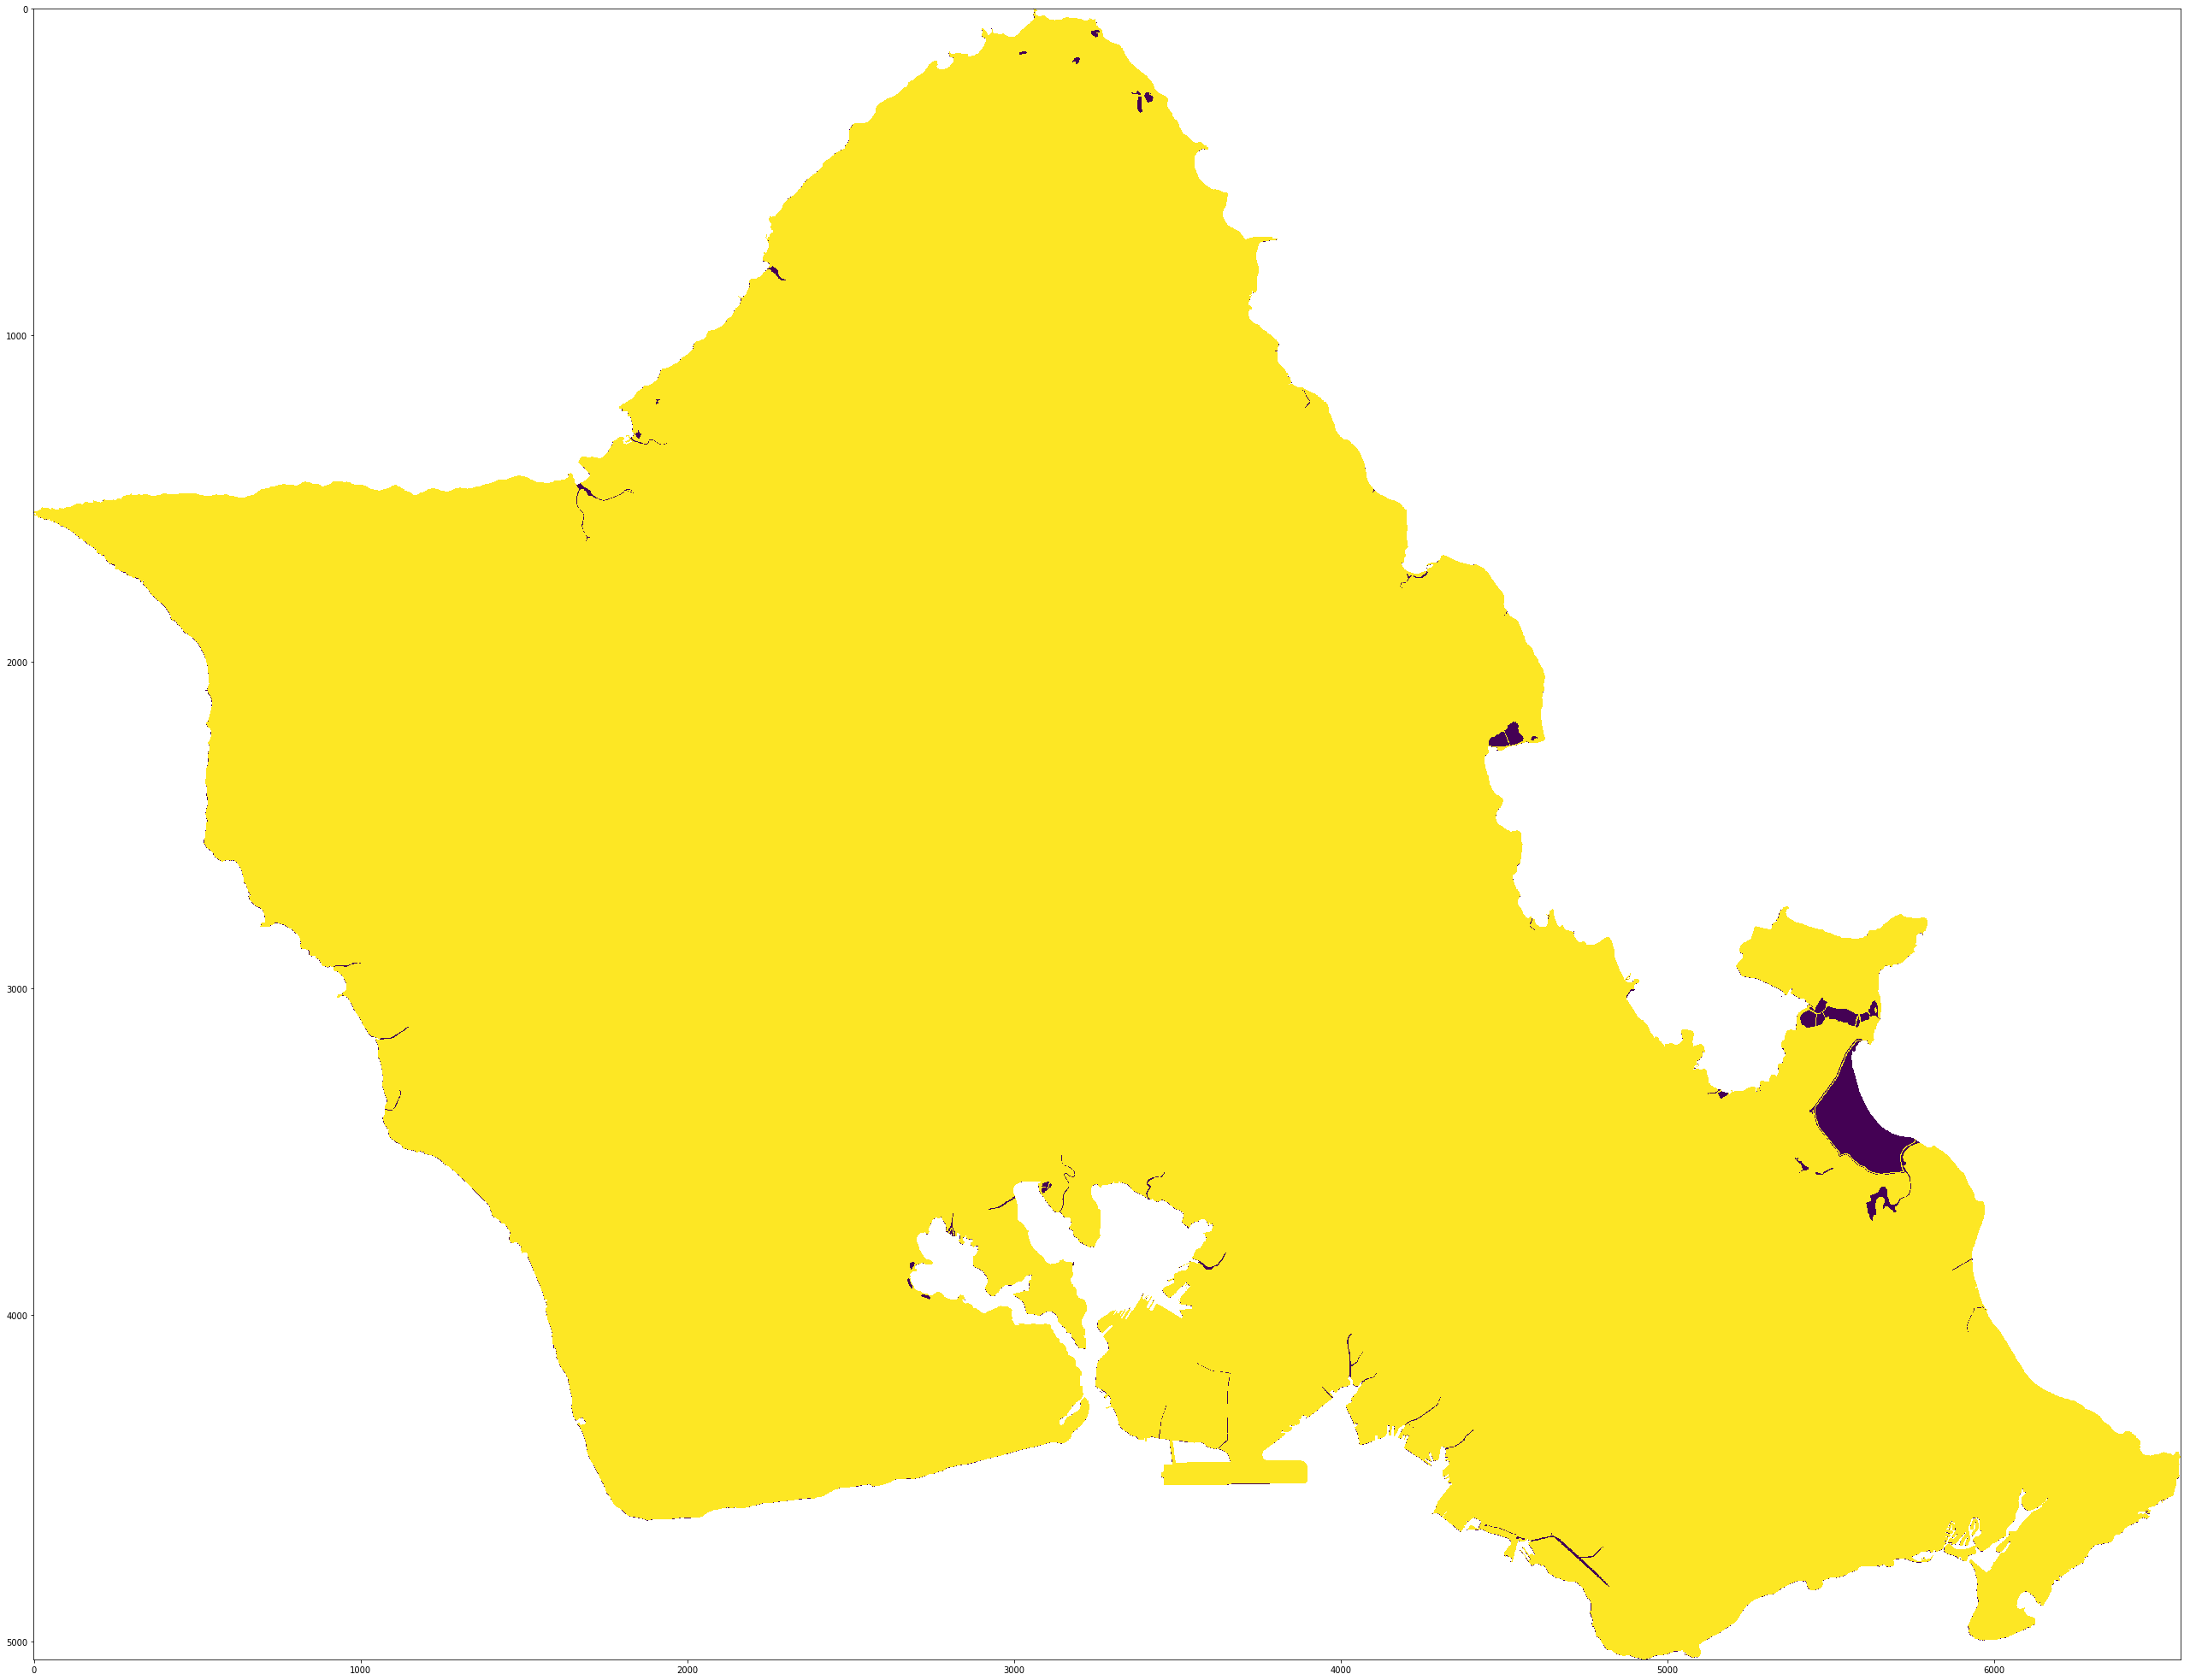

In [41]:
# Change the values of above 1-m elevation pixels to 1
array[array>=1]=1

# Change the below 1-m elevation pixels to 0
array[array<1]=0

# plot the array
riopl.show(array)

## Task 3: Raster data

This is a challenge for those who have time and are interested.

<p> <strong>Task: </strong>Please create a map displaying the DEM, census tract boundaries and crime incidents.</p>
<br> <strong>Submit:</strong> The code and printed map

<p>  You can extend from the task 'Plot multiple layers' and 'Selecting data by attributes' in the 'Vector data' section to create the map.
</p>

<p>
  Think about which stacking order of the layers. Which layer would you put on top, which is in middle, which is the basemap.
</p>

Load required packages

In [29]:
# Load the geopandas package, and name it gdp
import geopandas as gdp
# Import rasterio and rasterio.plot
import rasterio as rio
import rasterio.plot as riopl

import matplotlib.pyplot as plt
plt.ion() # turn on interactive plotting
plt.rcParams['figure.figsize'] = [45, 45] # enlarge the default plotting size

In [30]:
# Read the shapefile crime.shp into crime.
crime = gdp.read_file("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab2_data/crime.shp")

# Read the shapefile census tract boundaries.shp into ct.
ct = gdp.read_file("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab2_data/ct_oahu.shp")

# Read the raster of elevation (dem_oahu).
dem = rio.open("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab2_data/dem_oahu.tif")

### Solution 1
This is essentially overlay three map layers in a single map. You can imaging it is like stacking layers on top of each other.

In Python, you should specify a canvas (frame of plotting) to stack the layers. 

The solution 1 create an empty canvas using the first line, naming the convas ax1.

The following plots are all added to ax1 using `ax=ax1`.

Note: in jupyter notebook, you would need to write the following lines in one block to plot the all the layers.

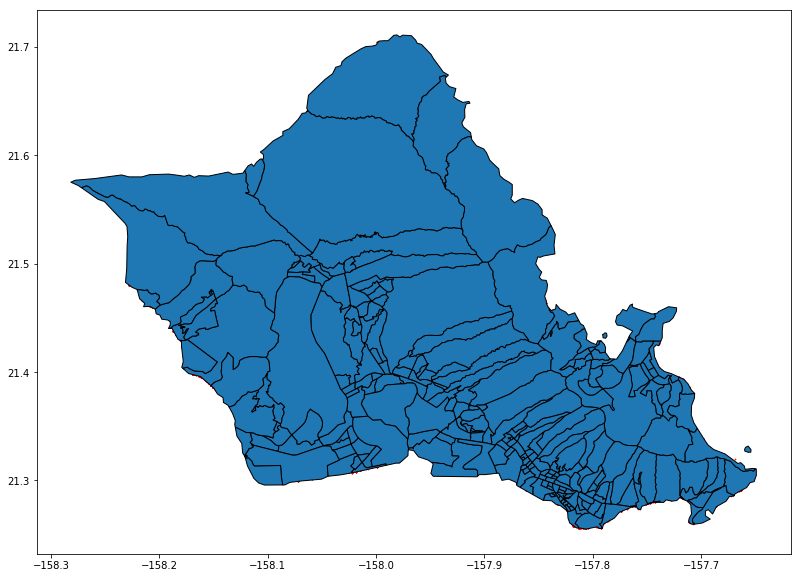

In [35]:
f, ax1 = plt.subplots(1, figsize=(15, 10))

# riopl.show(dem, cmap='OrRd',ax=ax1)


# Plot the crime points on top the canvas
crime.plot(marker='o', color='red', markersize=0.5,ax=ax1)

# Plot the census tract boundaries on top of dem_ax
ct.plot(edgecolor='black', linewidth = 1,ax=ax1)

plt.show()

### Solution 2

You can also get the canvas of the first plot, and make the following plots refer to the canvas of the first plot

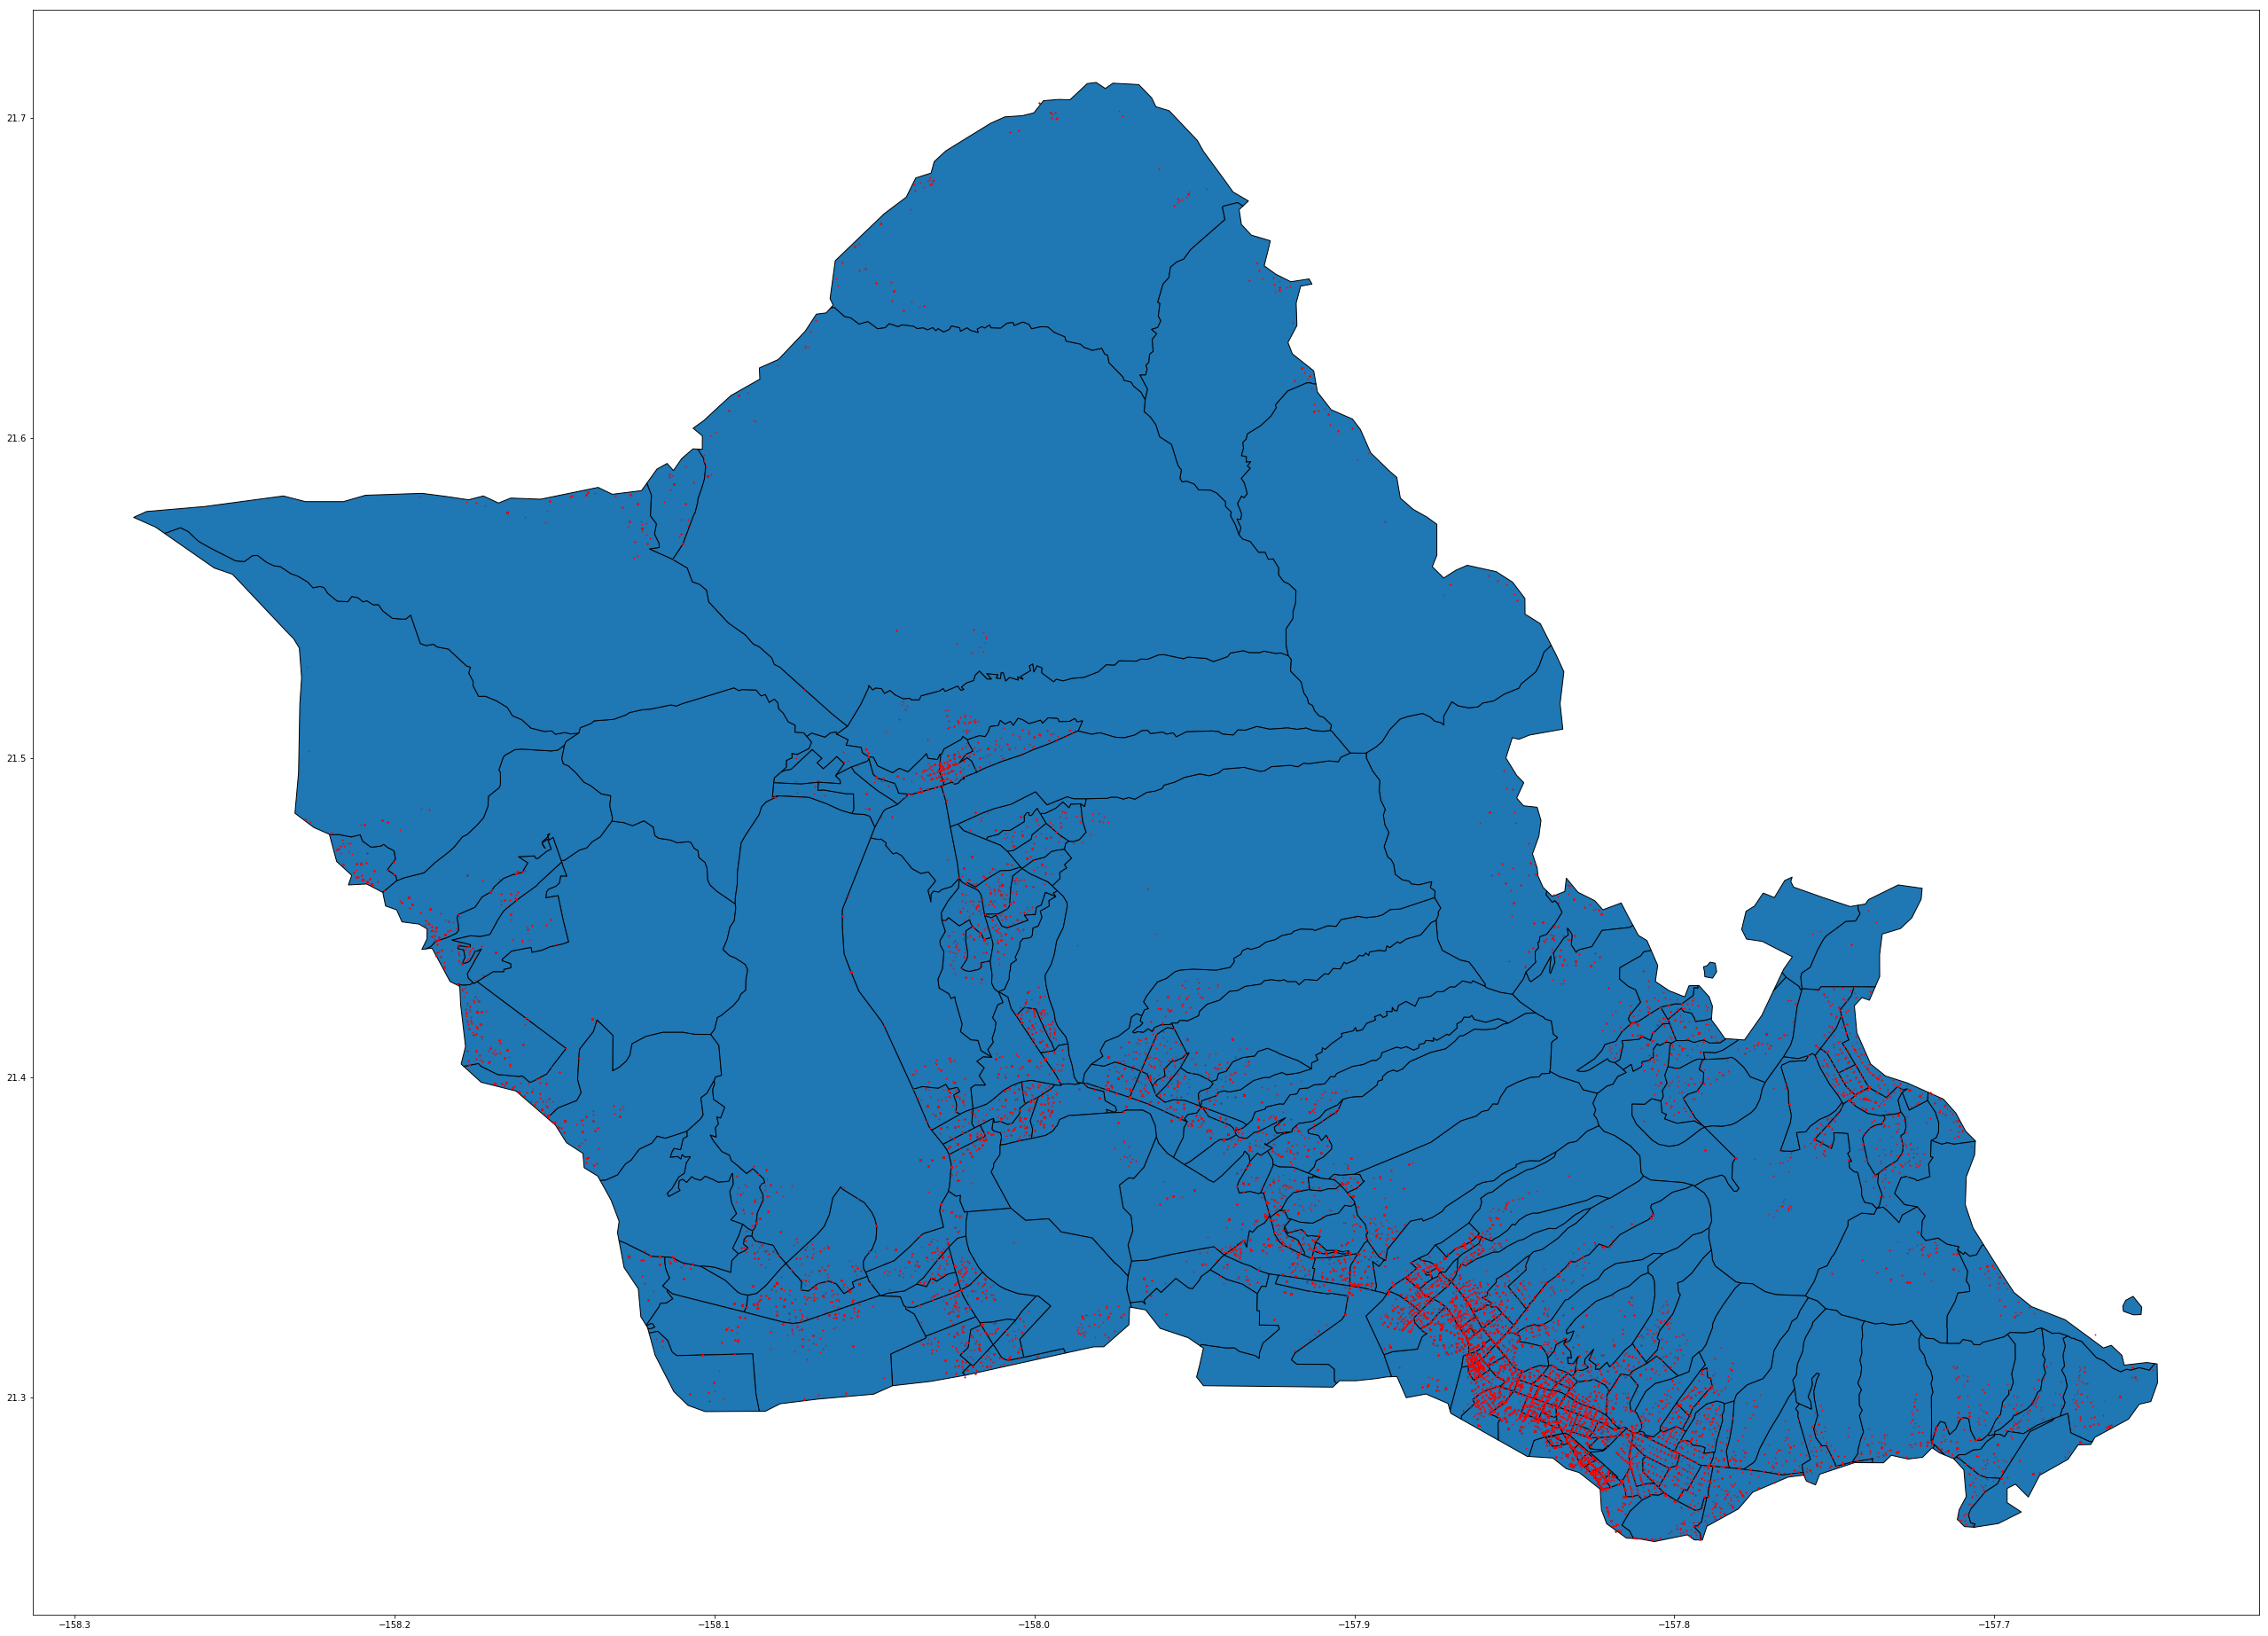

In [36]:
# Plot the census tracts and get the plotting canvas as ax1
ax1 = ct.plot(edgecolor='black', linewidth = 1)


# Plot the crime points on top the canvas ax1
crime.plot(marker='o', color='red', markersize=0.5,ax=ax1)


plt.show()

Then plot the census tract on top of the 